<a href="https://colab.research.google.com/github/DhirajBembade/Capstone-Eng-College-Placemaent/blob/main/Eng_College_Placemaent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📥 **Importing Necessary libraries-**

In [214]:
# Data processing, Linear algebra
import pandas as pd   
import numpy as np  

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import plotly.express as px

#sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [110]:
df=pd.read_csv("/content/drive/MyDrive/collegePlace.csv")

#📝**Basic Information about our Dataset-**

In [111]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [112]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [114]:
df.shape
print(" Shape of the DataFrame is: " , df.shape)

 Shape of the DataFrame is:  (2966, 8)


In [115]:
# No of rows and columns in DataFrame
print('Number of rows: {} \nNumber of columns: {}'.format(df.shape[0],df.shape[1]))

Number of rows: 2966 
Number of columns: 8


In [116]:
# Numerical data
num_cols = df.select_dtypes(include = 'number').columns.size
cat_cols = df.shape[1] - num_cols
print('Number of numerical columns: {} \nNumber of categorical columns: {}'.format(num_cols, cat_cols))

Number of numerical columns: 6 
Number of categorical columns: 2


In [117]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [118]:
#To get the data type of each column of a dataframe:
df.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [119]:
df.duplicated().sum()

1829

#**🔍Null Values-**

In [120]:
#checking the null values in our dataset
df.isnull()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [121]:
#Dealing with null value
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

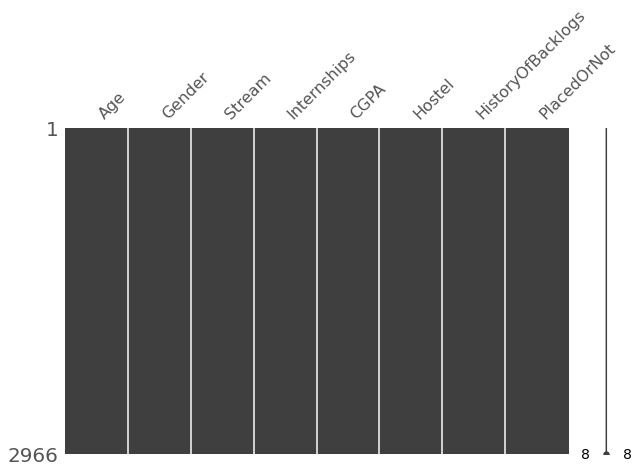

In [122]:
import missingno as msno
msno.matrix(df, figsize=(10,6))
plt.show()

In [123]:
df.shape

(2966, 8)

#**📈 Statistical information-**

In [124]:
df.describe(include = "all")

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,1.000000,0.000000,1.000000


**or**

In [125]:
df.describe(include = ['O']).T

,count,unique,top,freq
Gender,2966,2,Male,2475
Stream,2966,6,Computer Science,776


In [126]:
df.nunique()

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
PlacedOrNot           2
dtype: int64

#**🔥 EDA & Visualization-**

#**#1] Age Column Unique and Value Counts-**

In [127]:
df["Age"].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [128]:
df["Age"].value_counts()

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64

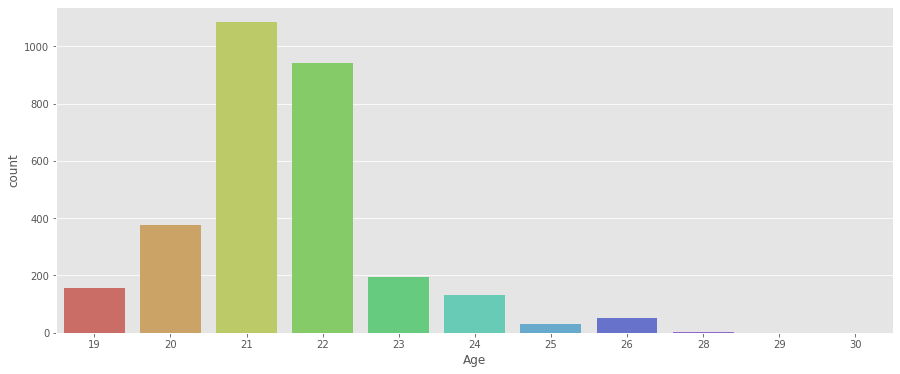

In [129]:
plt.figure(figsize=(15,6))
sns.countplot("Age",data = df, palette = "hls" )
plt.show()

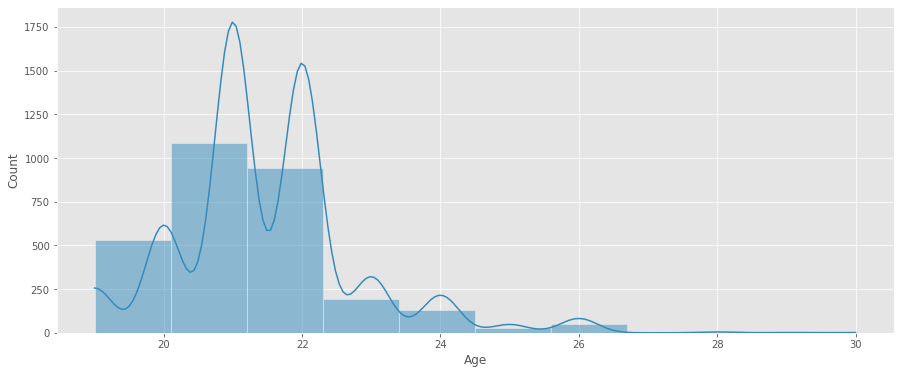

In [130]:
plt.figure(figsize=(15,6))
sns.histplot(df["Age"], kde = True, bins=10, palette="hls")
plt.show()

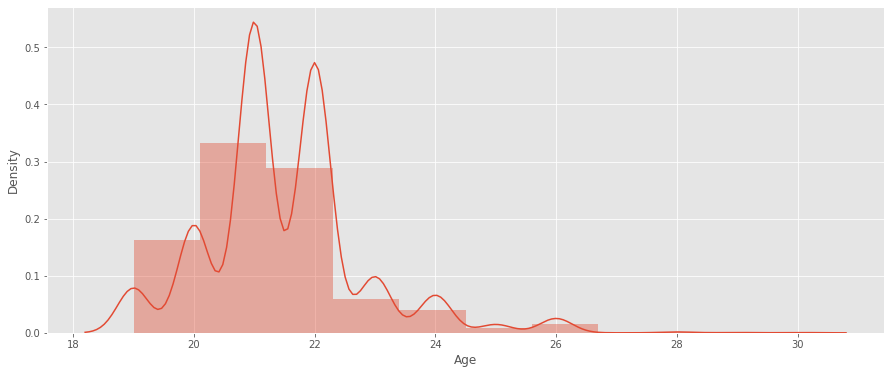

In [131]:
plt.figure(figsize=(15,6))
sns.distplot(df["Age"], kde = True, bins=10)
plt.show()

##**#Mean Age of Student-**

In [132]:
df['Age'].mean()

21.48583951449764

In [133]:
fig = px.histogram(df, 'Age',
                   title="<b>Average Age of Student</b>")

fig.add_vline(x=df['Age'].mean(), line_width=2, line_dash="dash", line_color="red")

fig

In [134]:
fig = px.histogram(df, 'Age',             
                   color = "Gender",
                   marginal = 'violin',
                   title = "<b>Average Age Gender wise</b>")

fig.update_traces(marker = {"opacity": 0.7})

fig.add_vline(x = df['Age'].mean(),
              line_width = 2,
              line_dash = "dash",
              line_color = "black")

fig

#**#2] Gender Column Unique and Value Counts-**

In [135]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [136]:
df["Gender"].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

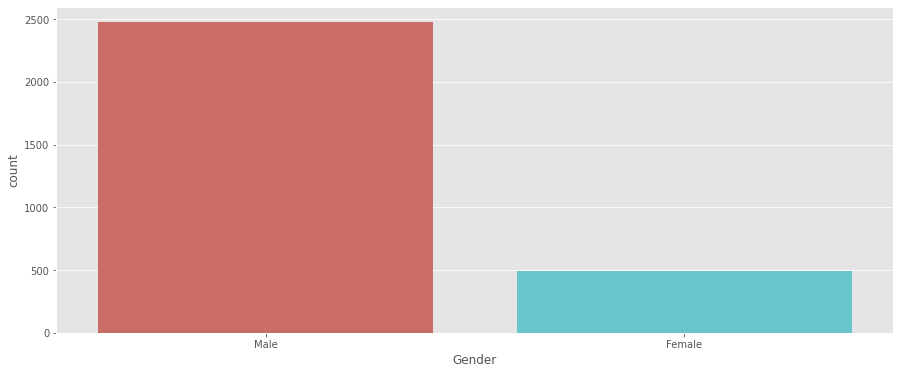

In [137]:
plt.figure(figsize=(15,6))
sns.countplot("Gender",data = df, palette = "hls" )
plt.show()

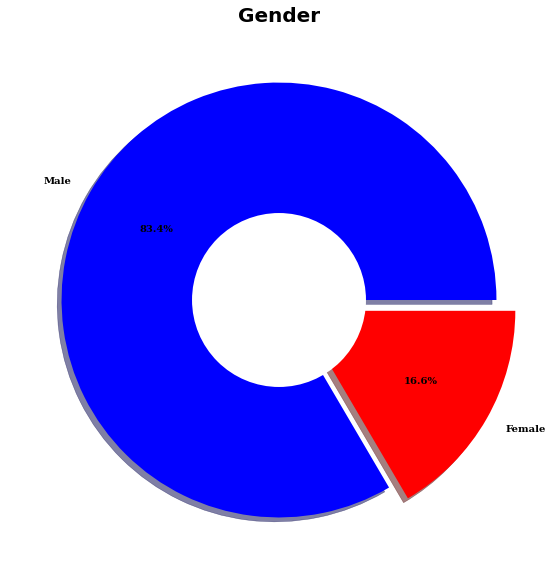

In [138]:
label_data = df['Gender'].value_counts( )

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'Gender', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

--**Our Dataset have more Male student than Female.**

#**#3] Stream Column Unique and Value Counts-**

In [139]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [140]:
df.Stream.value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [141]:
print("Stream:",df["Stream"].nunique())
df["Stream"].value_counts().nlargest(10).to_frame()

Stream: 6


,Stream
Computer Science,776
Information Technology,691
Electronics And Communication,424
Mechanical,424
Electrical,334
Civil,317


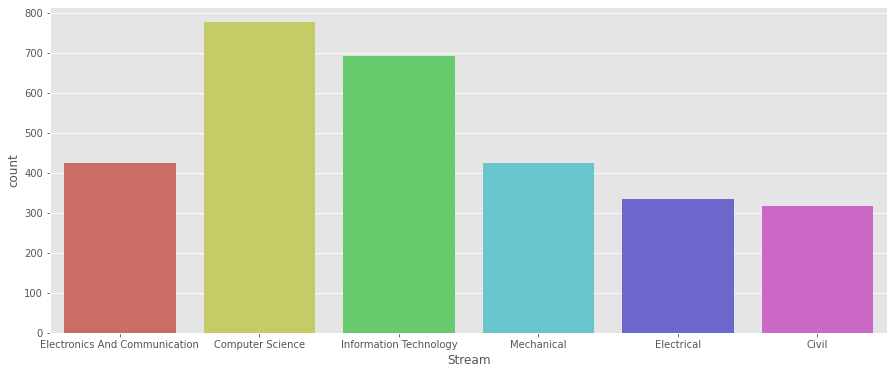

In [142]:
plt.figure(figsize=(15,6))
sns.countplot("Stream",data = df, palette = "hls" )
plt.show()

--**Our Dataset have 6 stream & max student belong to Computer Science field.**  

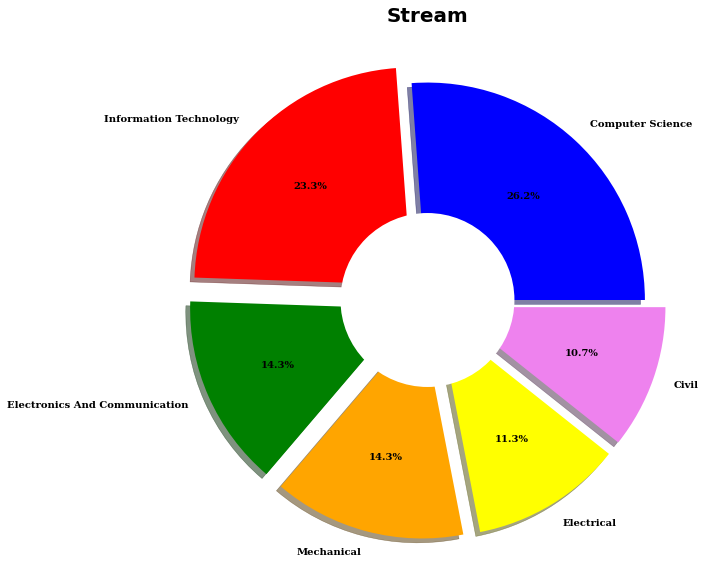

In [143]:
label_data = df['Stream'].value_counts( )

explode = (0.0, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'blue', 'red', 'green', 'orange', 'yellow', 'violet'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'Stream', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

**--Majority of candidate are Computer Science Student**

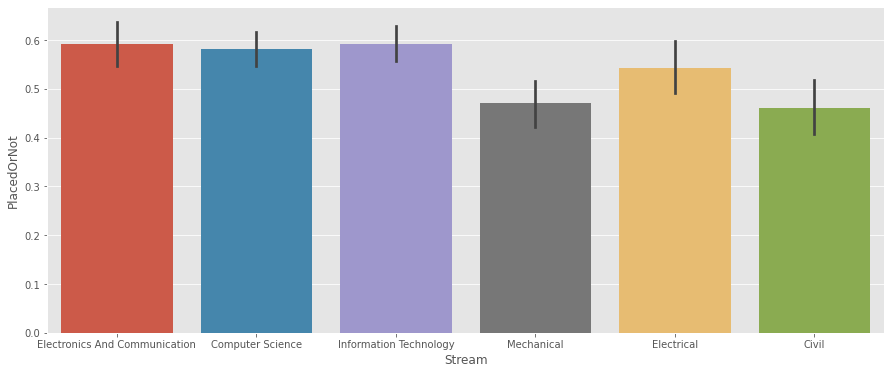

In [144]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Stream, y = df.PlacedOrNot)
plt.show()

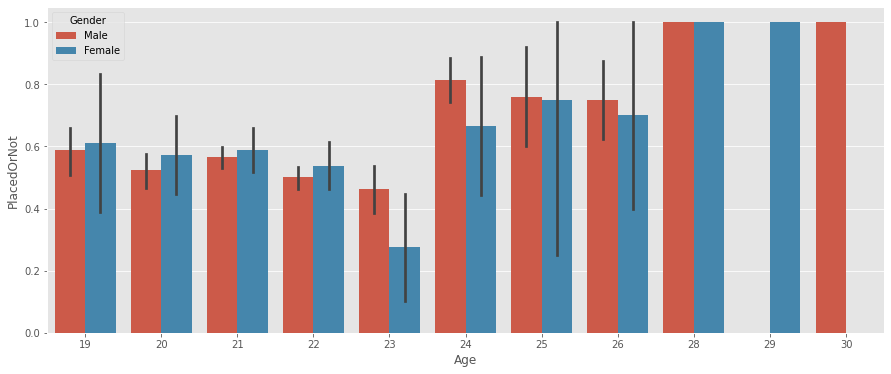

In [145]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Age, y = df.PlacedOrNot, hue = df.Gender)
plt.show()

#**#4] Internships Column Unique and Value Counts-**

In [146]:
df["Internships"].unique()

array([1, 0, 2, 3])

In [147]:
df["Internships"].value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

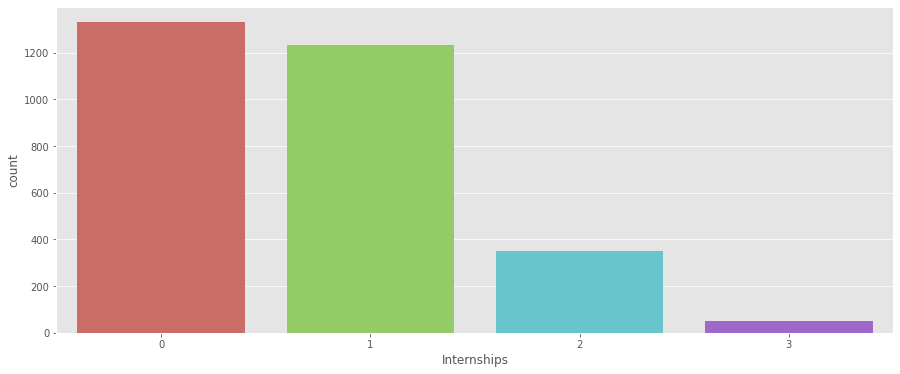

In [148]:
plt.figure(figsize=(15,6))
sns.countplot("Internships",data = df, palette = "hls" )
plt.show()

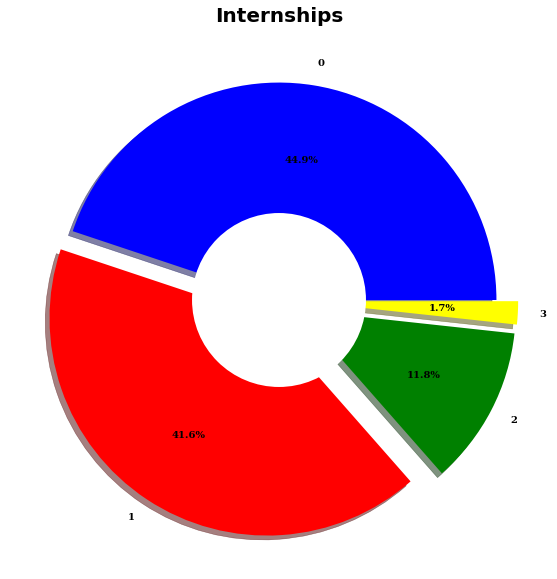

In [149]:
label_data = df['Internships'].value_counts( )

explode = (0.0, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'blue', 'red', 'green', 'yellow'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'Internships', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

#**#5] CGPA Column Unique and Value Counts-**

In [150]:
df["CGPA"].unique()

array([8, 7, 6, 9, 5])

In [151]:
df["CGPA"].value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

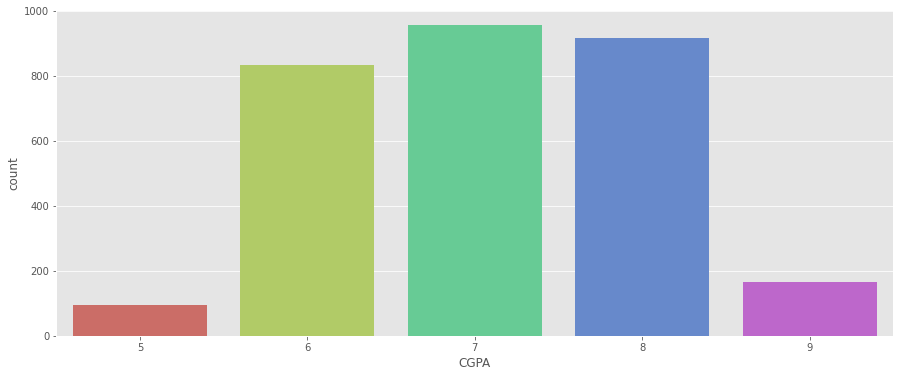

In [152]:
plt.figure(figsize=(15,6))
sns.countplot("CGPA",data = df, palette = "hls" )
plt.show()

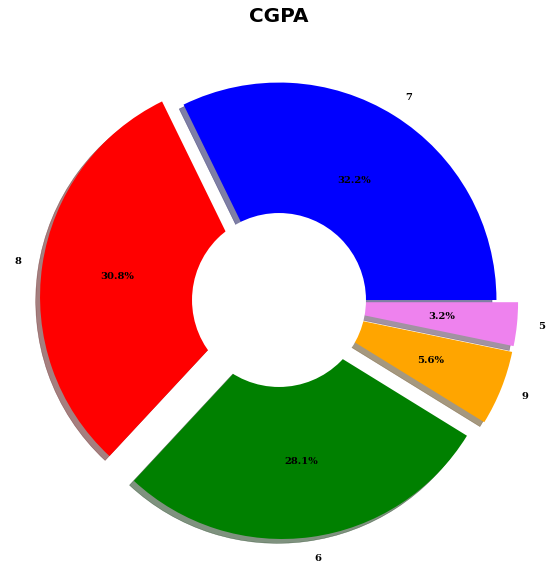

In [153]:
label_data = df['CGPA'].value_counts( )

explode = (0.0, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'blue', 'red', 'green', 'orange', 'violet'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'CGPA', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

#**#6] Hostel Column Unique and Value Counts-**

In [154]:
df["Hostel"].unique()

array([1, 0])

In [155]:
df["Hostel"].value_counts()

0    2168
1     798
Name: Hostel, dtype: int64

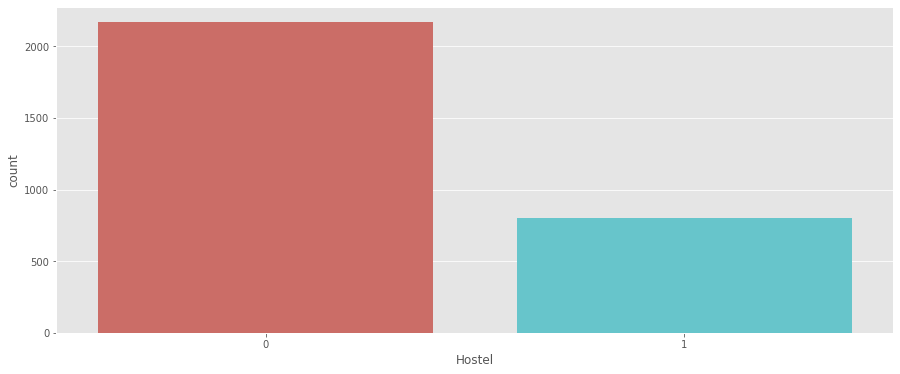

In [156]:
plt.figure(figsize=(15,6))
sns.countplot("Hostel",data = df, palette = "hls" )
plt.show()

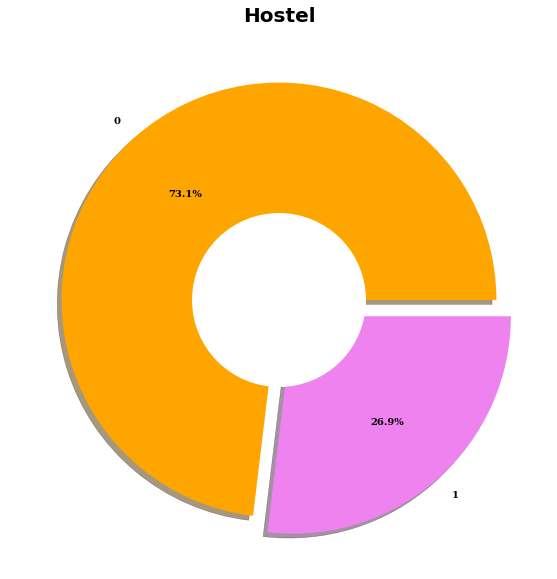

In [157]:
label_data = df['Hostel'].value_counts( )

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'orange', 'violet'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'Hostel', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

#**#7] History of Backlogs Column Unique and Value Counts-**

In [158]:
df["HistoryOfBacklogs"].unique()

array([1, 0])

In [159]:
df["HistoryOfBacklogs"].value_counts()

0    2396
1     570
Name: HistoryOfBacklogs, dtype: int64

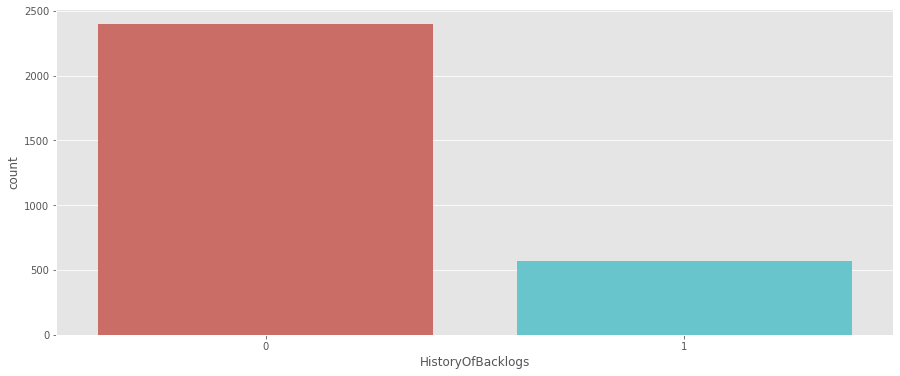

In [160]:
plt.figure(figsize=(15,6))
sns.countplot("HistoryOfBacklogs",data = df, palette = "hls" )
plt.show()

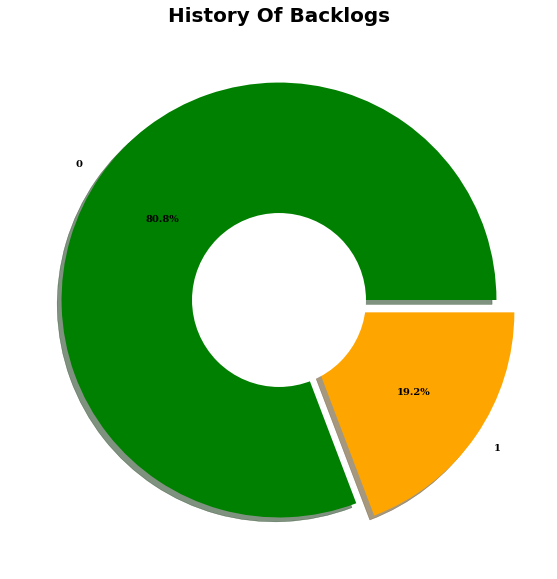

In [161]:
label_data = df['HistoryOfBacklogs'].value_counts( )

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'green', 'orange'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'History Of Backlogs', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

#**#8] Placed or Not Column Unique and Value Counts-**

In [162]:
df["PlacedOrNot"].unique()

array([1, 0])

In [163]:
df["PlacedOrNot"].value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

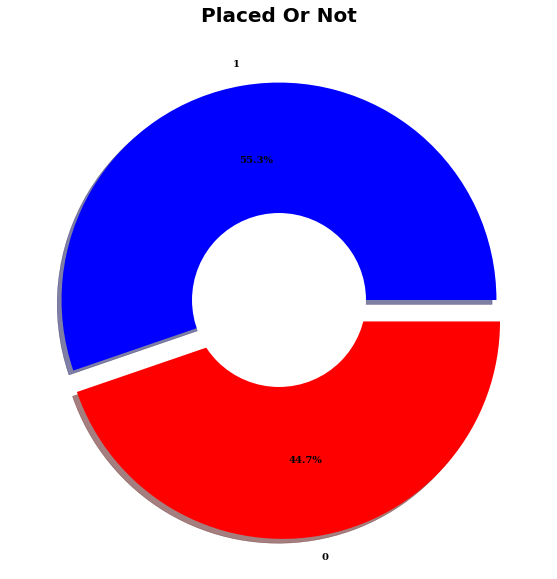

In [164]:
label_data = df['PlacedOrNot'].value_counts( )

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10)) 
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = [ 'blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0, 
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={'fontsize' : 10,
                                          'color':'black',
                                          'weight':'bold',
                                          'family':'serif' })
                                          
plt.setp(pcts, color='black' )

hfont = {'fontname' : ' serif', 'weight': 'bold'}
plt.title( 'Placed Or Not', size=20, ** hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white') 
fig = plt.gcf( ) 
fig.gca().add_artist(centre_circle)
plt.show( )

In [165]:
from IPython.core. display import HTML

def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 20) 
    table_list = [] 
    for col in columns:
        table_list. append(pd.DataFrame(df[col].value_counts())) 
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>") 


value_counts_all(df,["Age", "Gender", "Stream", "Internships", "Hostel", "CGPA","PlacedOrNot"])

,Age
21,1084
22,941
20,375
23,195
19,156
24,131
26,50
25,29
28,3
30,1


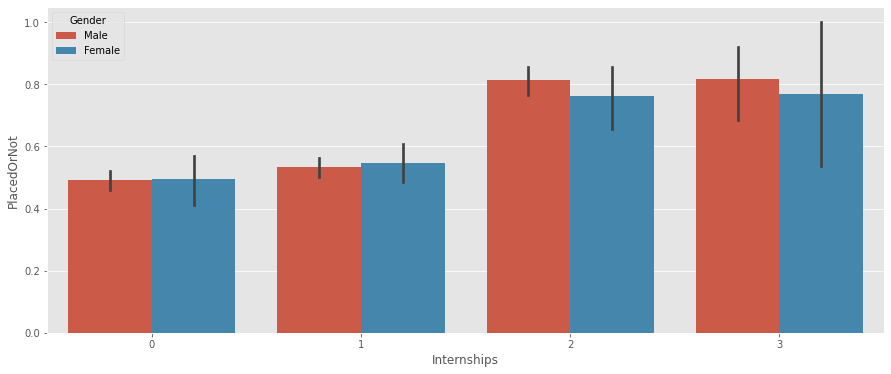

In [166]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Internships, y = df.PlacedOrNot, hue = df.Gender)
plt.show()

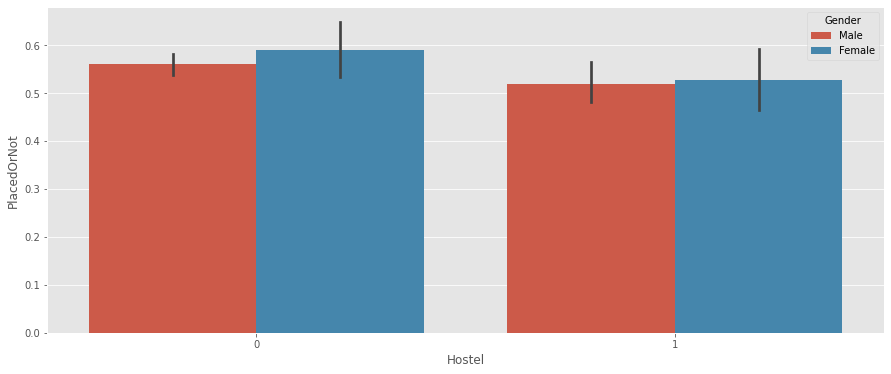

In [167]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Hostel, y = df.PlacedOrNot, hue = df.Gender)
plt.show()

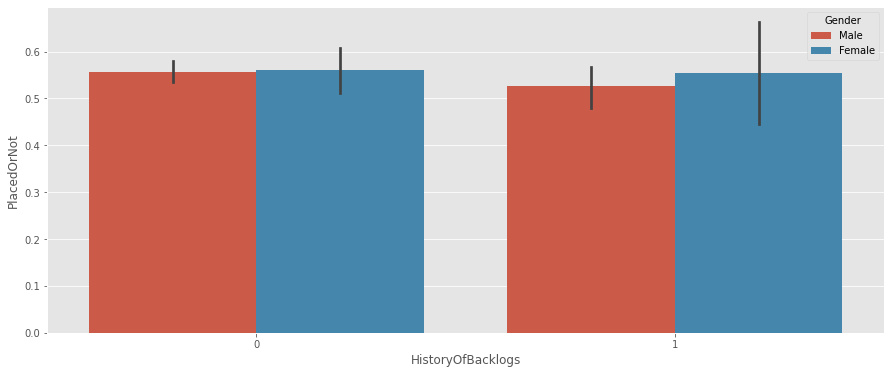

In [168]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.HistoryOfBacklogs, y = df.PlacedOrNot, hue = df.Gender)
plt.show()

#**#Column Relation Analysing-**

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


#**#Total Male and Female Pass Placement-**

In [170]:
male = df[df['Gender'] == "Male"]
female = df[df['Gender'] == "Female"]

In [171]:
total_male = male.shape[0]
total_female = female.shape[0]

In [172]:
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]
pass_male_percentage = np.round((total_male_pass * 100) / total_male,2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female,2)

In [173]:
details = {"Total Male": [total_male],
             "Total Female": [total_female],
             "Total male pass" : [total_male_pass],
             "Total female pass" : [total_female_pass],
             "% of Passed Male" : [pass_male_percentage],
             "% of Passed Female" : [pass_female_percentage]}
details

{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

In [174]:
gender_wise = pd.DataFrame(details, index=["Detail"])
gender_wise.T


,Detail
Total Male,2475.00
Total Female,491.00
Total male pass,1364.00
Total female pass,275.00
% of Passed Male,55.11
% of Passed Female,56.01


In [175]:
print("Max Age of Placed Person: ",df[(df['Age'] == df['Age'].max()) & (df['PlacedOrNot']==1)]['Age'].values[0])
print("Min Age of Placed Person: ",df[(df['Age'] == df['Age'].min()) & (df['PlacedOrNot']==1)]['Age'].values[0])

Max Age of Placed Person:  30
Min Age of Placed Person:  19


In [209]:
fig = px.histogram(data_frame = df,
             x = "Stream",
             color="PlacedOrNot", title="<b>Counts of Stream</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig

--**Majority of candidate are Computer Science Student and they are also large in number who got placement as compare to other Streams.**

#**#Displaying all those records whose CGPA is above average-**

In [177]:
#Displaying all those records whose CGPA is above average
cgpa_above_avg = df[df['CGPA'] > df['CGPA'].mean()]

cgpa_above_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
11,22,Female,Electrical,1,8,0,1,1
13,21,Male,Computer Science,1,8,0,1,1
...,...,...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,0,0,1
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2956,22,Male,Computer Science,0,8,0,0,1


In [206]:
fig = px.histogram(data_frame = cgpa_above_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Above Average CGPA Vs Placement</b>",
                   template="plotly_dark")

fig.update_layout(bargap=0.1)

fig

#**#Candidates whose CGPA is below average-**

In [179]:
#Candidates whose CGPA is below average
cgpa_below_avg = df[df['CGPA'] < df['CGPA'].mean()]

cgpa_below_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
...,...,...,...,...,...,...,...,...
2960,23,Male,Mechanical,1,7,1,0,0
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0


In [210]:
fig = px.histogram(data_frame = cgpa_below_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Below Average CGPA Vs Placement</b>",
                   template='plotly_dark', barmode='group')

fig.update_layout(bargap=0.2)

fig


--**From above above, if some student has CGPA below average it will reduce his/her chances of placement.**

#**#Analyze important features stream wise-**

In [181]:
stream_wise = df.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'sum',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'sum'})

stream_wise.style.highlight_max()

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.441640,173,7.094637,146
Computer Science,21.559278,676,7.039948,452
Electrical,21.299401,203,7.080838,181
Electronics And Communication,21.410377,306,7.125000,251
Information Technology,21.539797,509,7.073806,409
Mechanical,21.518868,220,7.063679,200


In [182]:
px.bar(data_frame=stream_wise, barmode='group',
       title = "<b>Stream wise Analyzing</b>")

#**# Effect of No Internship Experience on Placement-**

In [183]:
no_internship = df[df['Internships'] == 0]
no_internship

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
...,...,...,...,...,...,...,...,...
2956,22,Male,Computer Science,0,8,0,0,1
2958,23,Male,Computer Science,0,6,0,1,0
2959,23,Male,Information Technology,0,7,0,0,0
2961,23,Male,Information Technology,0,7,0,0,0


In [211]:
fig = px.histogram(data_frame = no_internship,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No Internship Experience Vs Placement</b>")

fig.update_layout(bargap = 0.2)

fig

--**So from above graph, if person don't have any Internship Experience, it will not much effect on his/her placement. Majority of the student who don't have any Internship Experience has passed the placement exam.**

#**#3-D Scatter plot-**

In [213]:
# 3D Scatter plot
import plotly.express as px
fig = px.scatter_3d(df, x='Gender', z='PlacedOrNot', y='Stream', color='CGPA')
fig.show()

#**#Top words in Stream-**

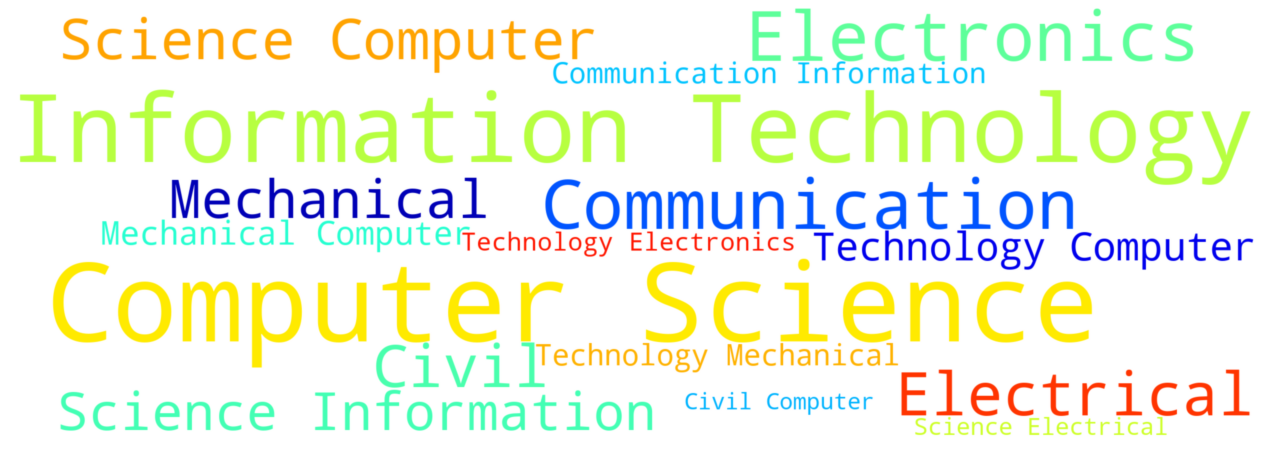

In [186]:
from dataclasses import field
from wordcloud import WordCloud, STOPWORDS

text = " ".join(field for field in df["Stream"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 2300,
                       height = 800,
                       colormap = "jet",
                       background_color = "White").generate(text)
plt.figure(figsize = (50, 8))
plt.imshow(word_cloud,interpolation = "gaussian")
plt.axis("off")
plt.show()

#**#Training-**

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [188]:
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)

In [189]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [190]:
x=df.drop(['PlacedOrNot'], axis = 1)

In [191]:
y = df.PlacedOrNot

In [192]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() 
x = scaler.fit_transform(x)

In [193]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [194]:
cross_val_score(SVC() , x, y, cv = 3)

array([0.80384226, 0.82305359, 0.90384615])

In [195]:
cross_val_score(DecisionTreeClassifier(), x, y, cv = 3)

array([0.84428716, 0.84327604, 0.91497976])

In [196]:
cross_val_score(LogisticRegression( ), x, y, cv = 3)

array([0.71587462, 0.74418605, 0.83097166])

In [197]:
cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv = 3)

array([0.84428716, 0.84833165, 0.90080972])

In [198]:
cross_val_score(KNeighborsClassifier( ) , x, y , cv = 3)

array([0.809909  , 0.8008089 , 0.89473684])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [200]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [201]:
y_pred = model.predict (X_test)

In [202]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

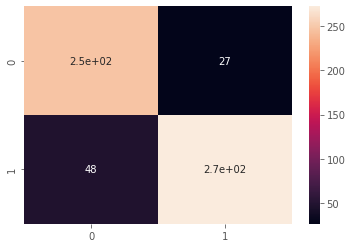

In [203]:
sns.heatmap(cm, annot = True) 
plt.show( )

In [204]:
print("Training Accuracy :",model.score(X_train, y_train)) 
print("Testing Accuracy :",model.score(X_test, y_test))

Training Accuracy : 0.9270657672849916
Testing Accuracy : 0.8737373737373737


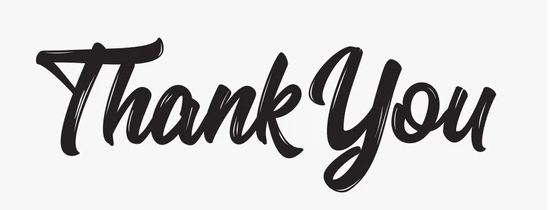